In [2]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


[1] "ipba-14-regression-graded-competition"

#  Data Insertion and Library import 


In [58]:
library(data.table)
library(corrplot)
library(GGally)
library(tidyverse)
library(PerformanceAnalytics)
library(plotly)
library(dplyr)
library(ggplot2)
library(gridExtra)

In [104]:
Train=read.csv("/kaggle/input/ipba-14-regression-graded-competition/train.csv")

Test=read.csv("/kaggle/input/ipba-14-regression-graded-competition/test.csv")

Submisson=read.csv("/kaggle/input/ipba-14-regression-graded-competition/sample_submission.csv")

#  Dataset Preview 

In [60]:
head(Train,5)
head(Test,5)

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,2.3859,15,3.827160,1.1120996,1280,2.486989,34.60,-120.12,0.980
2,1,3.7188,17,6.013373,1.0542169,1504,3.813084,38.69,-121.22,0.946
3,2,4.7750,27,6.535604,1.1031746,1061,2.464602,34.71,-120.45,1.576
4,3,2.4138,16,3.350203,0.9654321,1255,2.089286,32.66,-117.09,1.336
5,4,3.7500,52,4.284404,1.0692464,1793,1.604790,37.80,-122.41,4.500


,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,37137,1.7062,35,4.966368,1.096539,1318,2.844411,39.75,-121.85
2,37138,1.3882,22,4.187035,1.098229,2296,3.180218,33.95,-118.29
3,37139,7.7197,21,7.129436,0.959276,1535,2.888889,33.61,-117.81
4,37140,4.6806,49,4.769697,1.048485,707,1.743590,34.17,-118.34
5,37141,3.1284,25,3.765306,1.081633,4716,2.003827,34.17,-118.29


# Descriptive Summary of Train Data Set for Treating Anomaly


In [61]:
summary(Train)

str(Train)

       id            MedInc           HouseAge        AveRooms      
 Min.   :    0   Min.   : 0.4999   Min.   : 2.00   Min.   : 0.8511  
 1st Qu.: 9284   1st Qu.: 2.6023   1st Qu.:17.00   1st Qu.: 4.3575  
 Median :18568   Median : 3.5156   Median :25.00   Median : 5.0686  
 Mean   :18568   Mean   : 3.8510   Mean   :26.06   Mean   : 5.1631  
 3rd Qu.:27852   3rd Qu.: 4.6997   3rd Qu.:35.00   3rd Qu.: 5.8586  
 Max.   :37136   Max.   :15.0001   Max.   :52.00   Max.   :28.8376  
   AveBedrms       Population       AveOccup          Latitude    
 Min.   :0.500   Min.   :    3   Min.   :  0.950   Min.   :32.55  
 1st Qu.:1.020   1st Qu.:  952   1st Qu.:  2.394   1st Qu.:33.93  
 Median :1.055   Median : 1383   Median :  2.745   Median :34.19  
 Mean   :1.062   Mean   : 1661   Mean   :  2.831   Mean   :35.57  
 3rd Qu.:1.089   3rd Qu.: 1856   3rd Qu.:  3.125   3rd Qu.:37.70  
 Max.   :5.873   Max.   :35682   Max.   :502.991   Max.   :41.95  
   Longitude       MedHouseVal   
 Min.   :-124.

'data.frame':	37137 obs. of  10 variables:
 $ id         : int  0 1 2 3 4 5 6 7 8 9 ...
 $ MedInc     : num  2.39 3.72 4.78 2.41 3.75 ...
 $ HouseAge   : num  15 17 27 16 52 26 21 31 23 20 ...
 $ AveRooms   : num  3.83 6.01 6.54 3.35 4.28 ...
 $ AveBedrms  : num  1.112 1.054 1.103 0.965 1.069 ...
 $ Population : num  1280 1504 1061 1255 1793 ...
 $ AveOccup   : num  2.49 3.81 2.46 2.09 1.6 ...
 $ Latitude   : num  34.6 38.7 34.7 32.7 37.8 ...
 $ Longitude  : num  -120 -121 -120 -117 -122 ...
 $ MedHouseVal: num  0.98 0.946 1.576 1.336 4.5 ...


In [62]:
library(Hmisc)
describe(Train)

Train 

 10  Variables      37137  Observations
--------------------------------------------------------------------------------
id 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   37137        0    37137        1    18568    12379     1857     3714 
     .25      .50      .75      .90      .95 
    9284    18568    27852    33422    35279 

lowest :     0     1     2     3     4, highest: 37132 37133 37134 37135 37136
--------------------------------------------------------------------------------
MedInc 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   37137        0    12310        1    3.851    1.893    1.696    1.958 
     .25      .50      .75      .90      .95 
   2.602    3.516    4.700    6.127    7.116 

lowest :  0.4999  0.5360  0.6775  0.6825  0.6831
highest: 14.4211 14.4219 14.9009 15.0000 15.0001
--------------------------------------------------------------------------------
HouseAge 
       n  missing distinct     I

### Outlier Detection and Cleaning 
###  Lower Limit  Q1 – 1.5 * (Q3-Q1)   
### Upper Limit  Q1 + 1.5 * (Q3-Q1)
#### all observations outside of the following interval will be considered as potential outliers:

#### I = [q_{0.25} - 1.5*IQR;   q_{0.75} + 1.5*IQR]


In [63]:
quants = c(0.05,0.25, 0.5, 0.75,0.99)
sapply(Train, quantile, probs = quants[c(1,5)])

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
5%,1856.80,1.69550,8,3.447461,0.9657668,569.80,1.848369,32.84,-122.4300,0.66500
99%,36764.64,10.22909,52,8.297101,1.3113500,7204.28,4.877240,40.40,-116.5636,5.00001


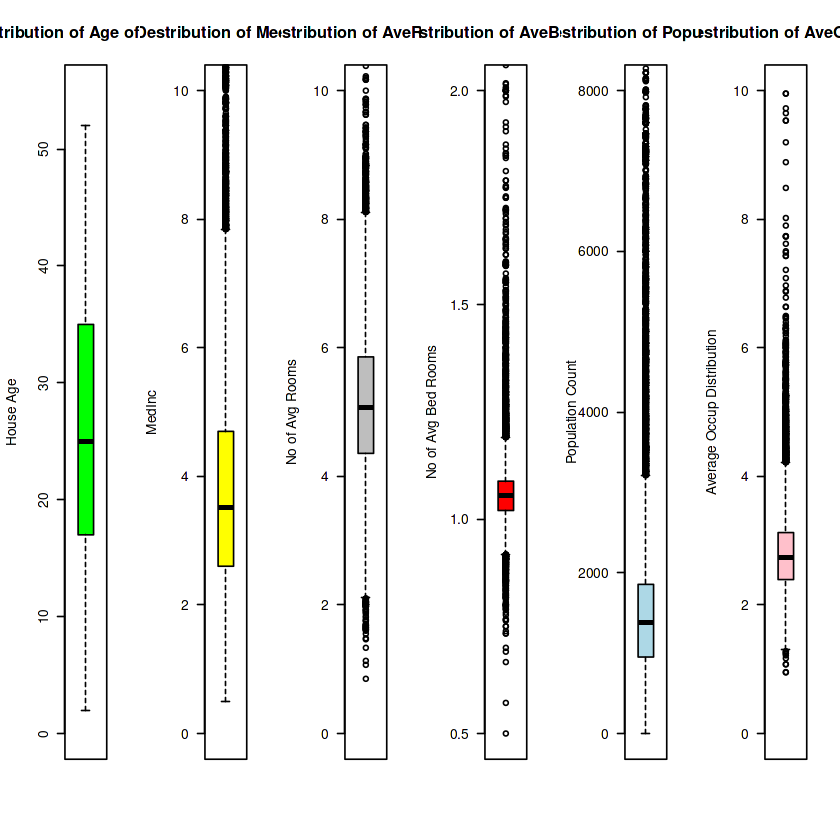

In [64]:
par(mfrow=c(1,6))

boxplot(Train$HouseAge, main= "Distribution of Age of House ", ylab="House Age", ylim=c(0,55), las=3, 
col="green")

boxplot(Train$MedInc, main= "Destribution of MedInc ", ylab="MedInc", ylim=c(0,10), las=1, 
col="yellow")

boxplot(Train$AveRooms, main= "Destribution of AveRooms ", ylab="No of Avg Rooms", ylim=c(0,10), las=1, 
col="grey")

boxplot(Train$AveBedrms, main= "Destribution of AveBedrms ", ylab="No of Avg Bed Rooms", ylim=c(0.5,2), las=1, 
col="red")

boxplot(Train$Population, main= "Destribution of Population ", ylab="Population Count", ylim=c(0,8000), las=1, 
col="lightblue")

boxplot(Train$AveOccup, main= "Destribution of AveOccup ", ylab="Average Occup Distribution", ylim=c(0,10), las=1, 
col="pink")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


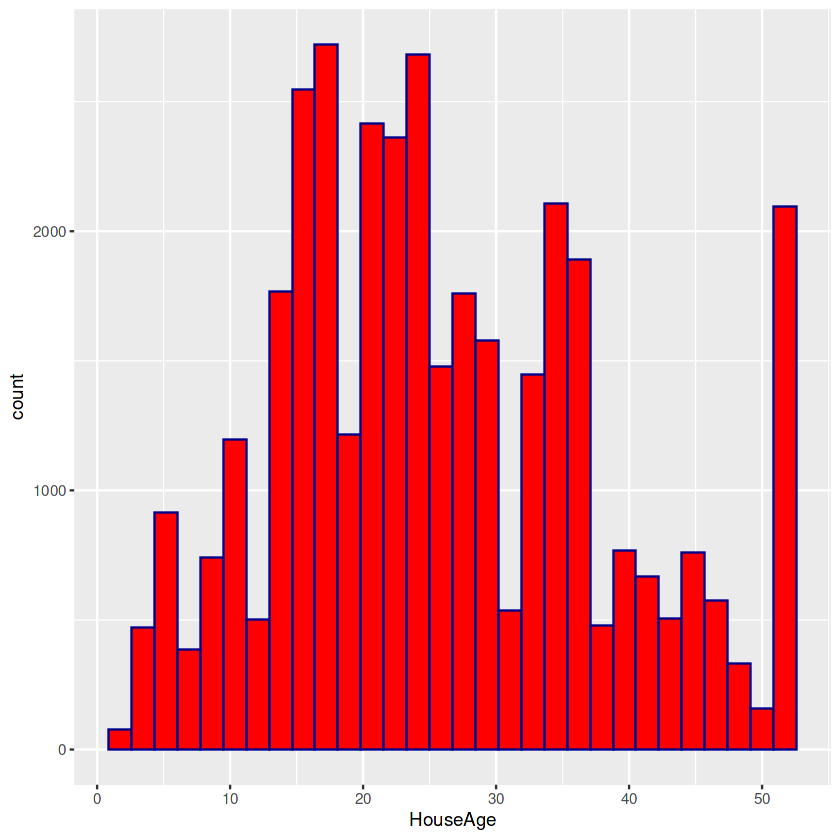

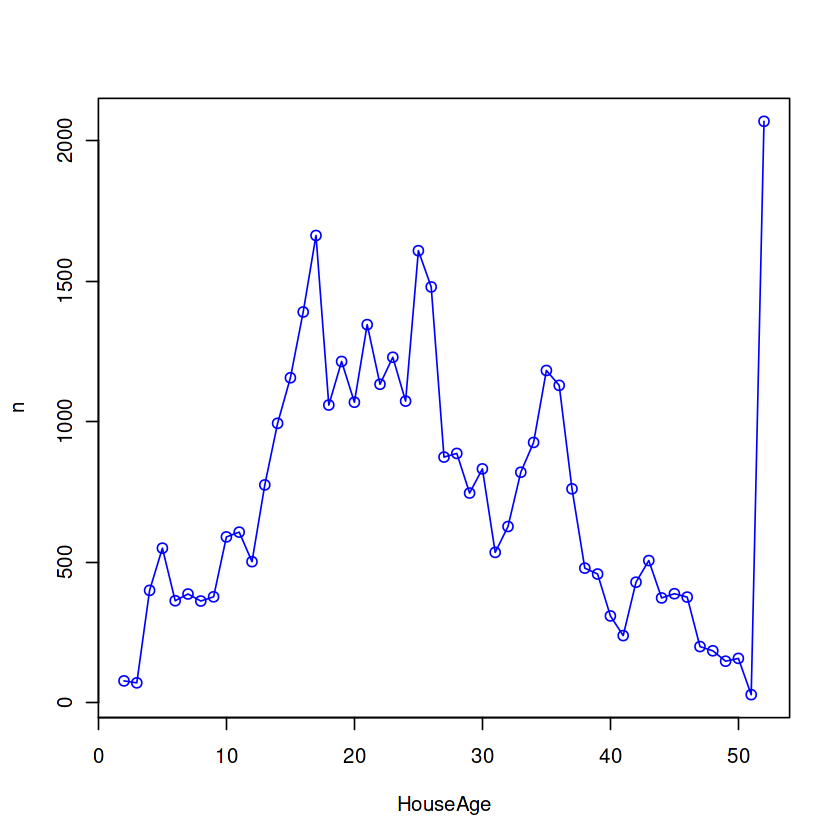

In [65]:
library(ggplot2)
ggplot(Train, aes(x=HouseAge))+
  geom_histogram(color="darkblue", fill="red")

houseage_summary=Train %>% count(HouseAge)
plot(houseage_summary,type = "o", col = "blue")



In [66]:
AveRooms_summary=Train %>% count(round(AveRooms))
plot(AveRooms_summary,type = "o", col = "blue", xlab = "AvgRooms", ylab = "No. of Rooms",
   main = "Avg Rooms Plot ")

ERROR: Error in eval(expr, envir, enclos): object 'Ave' not found


# Corelation plot

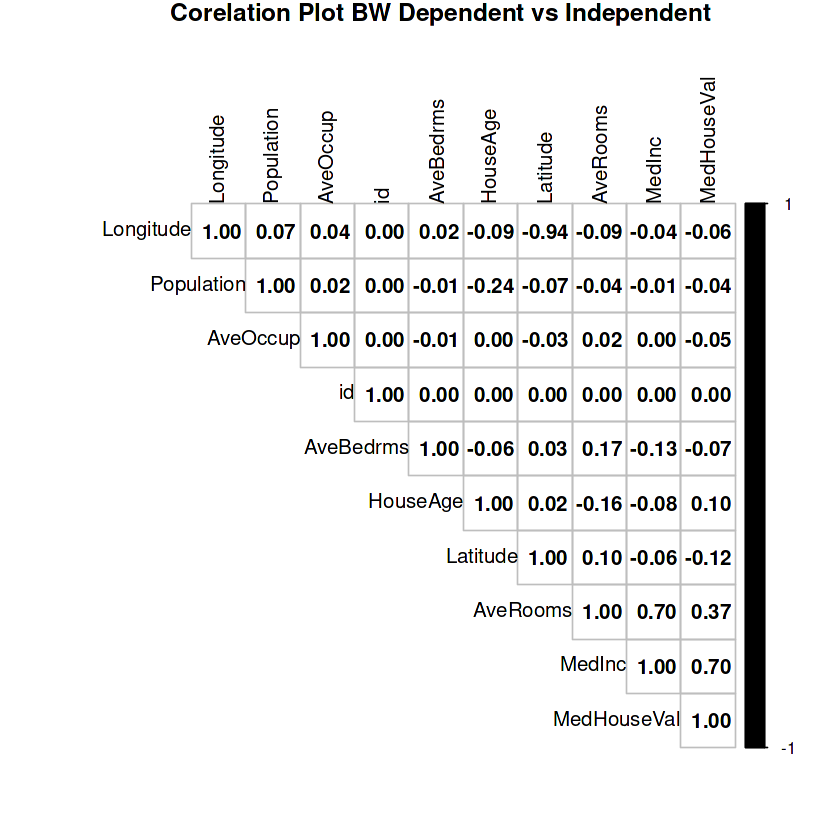

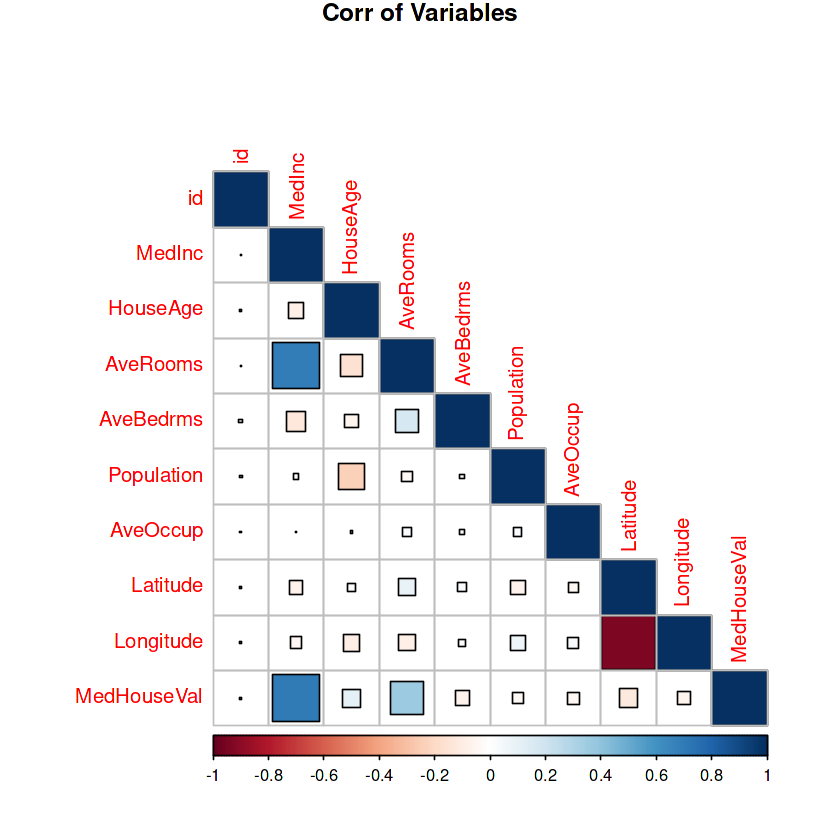

In [67]:
corrplot(cor(Train),
         method ="number",type ="upper",col="black",bg = "white",title="Corelation Plot BW Dependent vs Independent ", mar = c(1, 3, 1, 1),
         order = "AOE",tl.col = "black", tl.offset = 0 )

corrplot(cor(Train),
         method ="square",type ="lower",title="Corr of Variables",is.corr = TRUE, add = FALSE, diag = TRUE, outline = TRUE ,mar = c(1, 1, 1, 1))

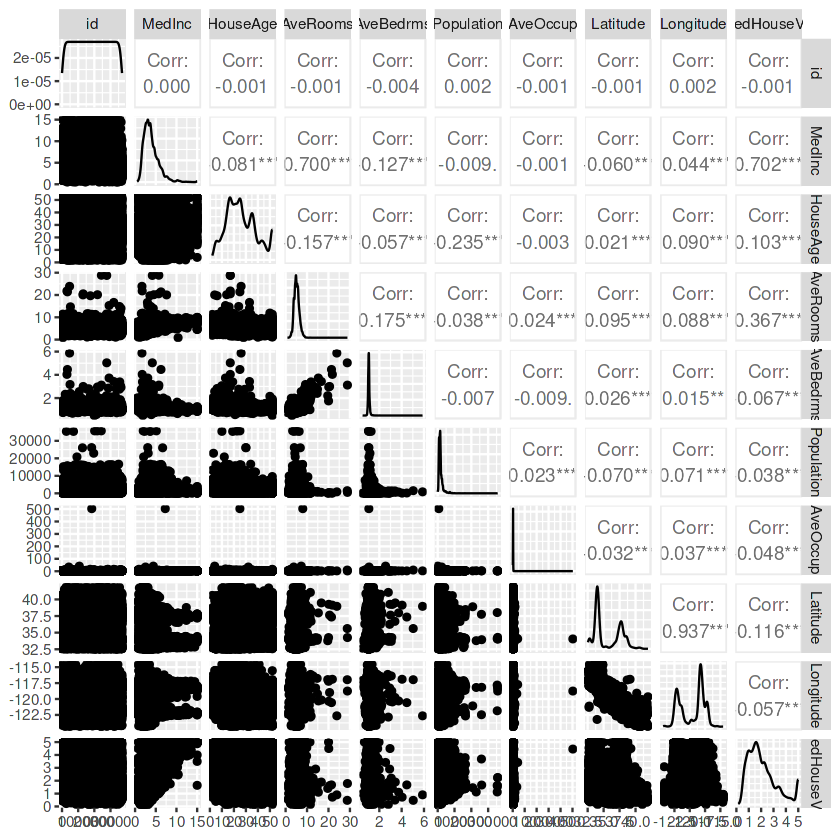

In [68]:
CorrPairs <- 
  Train %>% 
  select(id:MedHouseVal)
ggpairs(CorrPairs)

In [69]:
corr=cor(CorrPairs,method = "pearson")[,"MedHouseVal"]
data.frame(sort(corr))

,sort.corr.
,<dbl>
Latitude,-0.116498613
AveBedrms,-0.067487200
Longitude,-0.056742175
AveOccup,-0.048474502
Population,-0.038479464
id,-0.001357713
HouseAge,0.103210205
AveRooms,0.366727150
MedInc,0.701925274


 # Mutation and Wrangling of DS

In [105]:
quant = c(0.05,0.25, 0.5, 0.75,0.99)
Percentile<-data.frame(sapply(Train, quantile, probs = quants[c(2,3,4,5)]))
Percentile

###############################

MedInclowerlimit=Percentile[1,2]-1.5*(Percentile[3,2]-Percentile[2,2])
MedInclowerlimit
# 0.82615

MedIncUpperlimit=Percentile[3,2]+1.5*(Percentile[3,2]-Percentile[2,2])
MedIncUpperlimit
# 6.47585
# Cleaning of MedInc
Train$MedInc=ifelse(Train$MedInc>6.47585,6.47585,Train$MedInc)
Train$MedInc=ifelse(Train$MedInc<0.82615,0.82615,Train$MedInc)
summary(Train$MedInc)

###############################

HouseAgeLowerlimit=Percentile[1,3]-1.5*(Percentile[3,3]-Percentile[2,3])
HouseAgeLowerlimit
# 2

HouseAgeupperlimit=Percentile[3,3]+1.5*(Percentile[3,3]-Percentile[2,3])
HouseAgeupperlimit
# 50
# Cleaning of House Age 
Train$HouseAge=ifelse(Train$HouseAge>50,50,Train$HouseAge)
Train$HouseAge=ifelse(Train$HouseAge<2,2,Train$HouseAge)
summary(Train$HouseAge)

###############################

AvgRoomsLowerlimit=Percentile[1,4]-1.5*(Percentile[3,4]-Percentile[2,4])
AvgRoomsLowerlimit
# 3.17254214826455

AvgRoomsUpperlimit=Percentile[3,4]+1.5*(Percentile[3,4]-Percentile[2,4])
AvgRoomsUpperlimit
# 7.04357726069713
# Cleaning of Avg Rooms 
Train$AveRooms=ifelse(Train$AveRooms>7.04357726069713,7.04357726069713,Train$AveRooms)
Train$AveRooms=ifelse(Train$AveRooms<3.17254214826455,3.17254214826455,Train$AveRooms)
summary(Train$AveRooms)

###############################

AvgBedRmsLowerlimit=Percentile[1,5]-1.5*(Percentile[3,5]-Percentile[2,5])
AvgBedRmsLowerlimit
# 0.96888492799653

AvgBedRmsUpperlimit=Percentile[3,5]+1.5*(Percentile[3,5]-Percentile[2,5])
AvgBedRmsUpperlimit
# 1.1402448554311
# Cleaning of Avg Bed Rooms 
Train$AveBedrms=ifelse(Train$AveBedrms>1.1402448554311,1.1402448554311,Train$AveBedrms)
Train$AveBedrms=ifelse(Train$AveBedrms< 0.96888492799653, 0.96888492799653,Train$AveBedrms)
summary(Train$AveBedrms)

###############################

PopulationLowerlimit=Percentile[1,6]-1.5*(Percentile[3,6]-Percentile[2,6])
PopulationLowerlimit
# 242.5

PopulationUpperlimit=Percentile[3,6]+1.5*(Percentile[3,6]-Percentile[2,6])
PopulationUpperlimit
# 2565.5
# Cleaning of Population 
Train$Population=ifelse(Train$Population>2565.5,2565.5,Train$Population)
Train$Population=ifelse(Train$Population< 242.5, 242.5,Train$Population)
summary(Train$Population)

###############################

AveOccupLowerlimit=Percentile[1,7]-1.5*(Percentile[3,7]-Percentile[2,7])
AveOccupLowerlimit
# 1.82376686734235

AveOccupUpperlimit=Percentile[3,7]+1.5*(Percentile[3,7]-Percentile[2,7])
AveOccupUpperlimit
# 3.6960418287097
# Cleaning of Population 
Train$AveOccup=ifelse(Train$AveOccup>3.6960418287097, 3.6960418287097,Train$AveOccup)
Train$AveOccup=ifelse(Train$AveOccup<1.82376686734235,1.82376686734235,Train$AveOccup)
summary(Train$AveOccup)

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
25%,9284.00,2.60230,17,4.357522,1.020305,952.00,2.394495,33.93,-121.8000,1.20800
50%,18568.00,3.51560,25,5.068611,1.054545,1383.00,2.744828,34.19,-118.4500,1.80800
75%,27852.00,4.69970,35,5.858597,1.088825,1856.00,3.125313,37.70,-118.0200,2.66000
99%,36764.64,10.22909,52,8.297101,1.311350,7204.28,4.877240,40.40,-116.5636,5.00001


[1] 0.82615

[1] 6.47585

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.8262  2.6023  3.5156  3.7230  4.6997  6.4759 

[1] 2

[1] 50

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00   17.00   25.00   25.94   35.00   50.00 

[1] 3.172542

[1] 7.043577

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.173   4.358   5.069   5.129   5.859   7.044 

[1] 0.9688849

[1] 1.140245

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.9689  1.0203  1.0545  1.0557  1.0888  1.1402 

[1] 242.5

[1] 2565.5

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  242.5   952.0  1383.0  1466.2  1856.0  2565.5 

[1] 1.823767

[1] 3.696042

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.824   2.394   2.745   2.768   3.125   3.696 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.7062,35,4.966368,1.096539,1318,2.844411,39.75,-121.85
2,1.3882,22,4.187035,1.098229,2296,3.180218,33.95,-118.29
3,7.7197,21,7.129436,0.959276,1535,2.888889,33.61,-117.81
4,4.6806,49,4.769697,1.048485,707,1.743590,34.17,-118.34
5,3.1284,25,3.765306,1.081633,4716,2.003827,34.17,-118.29


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2.38590,15,3.827160,1.1120996,1280,2.486989,34.60,-120.12,0.980
2,3.71880,17,6.013373,1.0542169,1504,3.696042,38.69,-121.22,0.946
3,4.77500,27,6.535604,1.1031746,1061,2.464602,34.71,-120.45,1.576
4,2.41380,16,3.350203,0.9688849,1255,2.089286,32.66,-117.09,1.336
5,3.75000,50,4.284404,1.0692464,1793,1.823767,37.80,-122.41,4.500
6,6.47585,26,6.764372,1.0917874,2147,2.703540,33.84,-118.31,3.714


       id            MedInc          HouseAge        AveRooms    
 Min.   :    0   Min.   :0.8262   Min.   : 2.00   Min.   :3.173  
 1st Qu.: 9284   1st Qu.:2.6023   1st Qu.:17.00   1st Qu.:4.358  
 Median :18568   Median :3.5156   Median :25.00   Median :5.069  
 Mean   :18568   Mean   :3.7230   Mean   :25.94   Mean   :5.129  
 3rd Qu.:27852   3rd Qu.:4.6997   3rd Qu.:35.00   3rd Qu.:5.859  
 Max.   :37136   Max.   :6.4759   Max.   :50.00   Max.   :7.044  
   AveBedrms        Population        AveOccup        Latitude    
 Min.   :0.9689   Min.   : 242.5   Min.   :1.824   Min.   :32.55  
 1st Qu.:1.0203   1st Qu.: 952.0   1st Qu.:2.394   1st Qu.:33.93  
 Median :1.0545   Median :1383.0   Median :2.745   Median :34.19  
 Mean   :1.0557   Mean   :1466.2   Mean   :2.768   Mean   :35.57  
 3rd Qu.:1.0888   3rd Qu.:1856.0   3rd Qu.:3.125   3rd Qu.:37.70  
 Max.   :1.1402   Max.   :2565.5   Max.   :3.696   Max.   :41.95  
   Longitude       MedHouseVal   
 Min.   :-124.3   Min.   :0.150  
 

       id            MedInc           HouseAge        AveRooms     
 Min.   :37137   Min.   : 0.4999   Min.   : 2.00   Min.   : 1.000  
 1st Qu.:43326   1st Qu.: 2.5901   1st Qu.:17.00   1st Qu.: 4.356  
 Median :49516   Median : 3.5046   Median :25.00   Median : 5.077  
 Mean   :49516   Mean   : 3.8326   Mean   :26.04   Mean   : 5.169  
 3rd Qu.:55706   3rd Qu.: 4.6875   3rd Qu.:35.00   3rd Qu.: 5.859  
 Max.   :61895   Max.   :15.0001   Max.   :52.00   Max.   :56.269  
   AveBedrms        Population       AveOccup           Latitude    
 Min.   : 0.560   Min.   :    3   Min.   :  0.7647   Min.   :32.55  
 1st Qu.: 1.020   1st Qu.:  955   1st Qu.:  2.4000   1st Qu.:33.93  
 Median : 1.054   Median : 1398   Median :  2.7516   Median :34.20  
 Mean   : 1.064   Mean   : 1679   Mean   :  2.8308   Mean   :35.60  
 3rd Qu.: 1.088   3rd Qu.: 1874   3rd Qu.:  3.1292   3rd Qu.:37.72  
 Max.   :10.500   Max.   :35682   Max.   :230.1724   Max.   :41.95  
   Longitude     
 Min.   :-124.2  
 1st 

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
id,1.000000e+00,0.003258046,-0.001519853,0.001124939,-0.0005683475,0.0005966595,-9.065068e-05,-0.0009112755,0.001886785,-0.001357713
MedInc,3.258046e-03,1.000000000,-0.121838178,0.719026101,-0.2243726023,-0.0275263408,-8.755522e-03,-0.0600272682,-0.051627787,0.681355279
HouseAge,-1.519853e-03,-0.121838178,1.000000000,-0.168286673,-0.0605540703,-0.2670723979,-2.722582e-02,0.0166654413,-0.085457316,0.100363933
AveRooms,1.124939e-03,0.719026101,-0.168286673,1.000000000,-0.0685501251,-0.0838576162,1.136672e-01,0.1075755343,-0.101271915,0.359518195
AveBedrms,-5.683475e-04,-0.224372602,-0.060554070,-0.068550125,1.0000000000,0.0372082290,-1.105162e-01,0.0125279891,0.020226885,-0.097086579
Population,5.966595e-04,-0.027526341,-0.267072398,-0.083857616,0.0372082290,1.0000000000,1.710749e-01,-0.0967337541,0.098857406,-0.083184723
AveOccup,-9.065068e-05,-0.008755522,-0.027225818,0.113667247,-0.1105162091,0.1710748685,1.000000e+00,-0.1089231930,0.140220765,-0.240658944
Latitude,-9.112755e-04,-0.060027268,0.016665441,0.107575534,0.0125279891,-0.0967337541,-1.089232e-01,1.0000000000,-0.937369749,-0.116498613
Longitude,1.886785e-03,-0.051627787,-0.085457316,-0.101271915,0.0202268854,0.0988574061,1.402208e-01,-0.9373697487,1.000000000,-0.056742175
MedHouseVal,-1.357713e-03,0.681355279,0.100363933,0.359518195,-0.0970865793,-0.0831847230,-2.406589e-01,-0.1164986129,-0.056742175,1.000000000


[1] FALSE

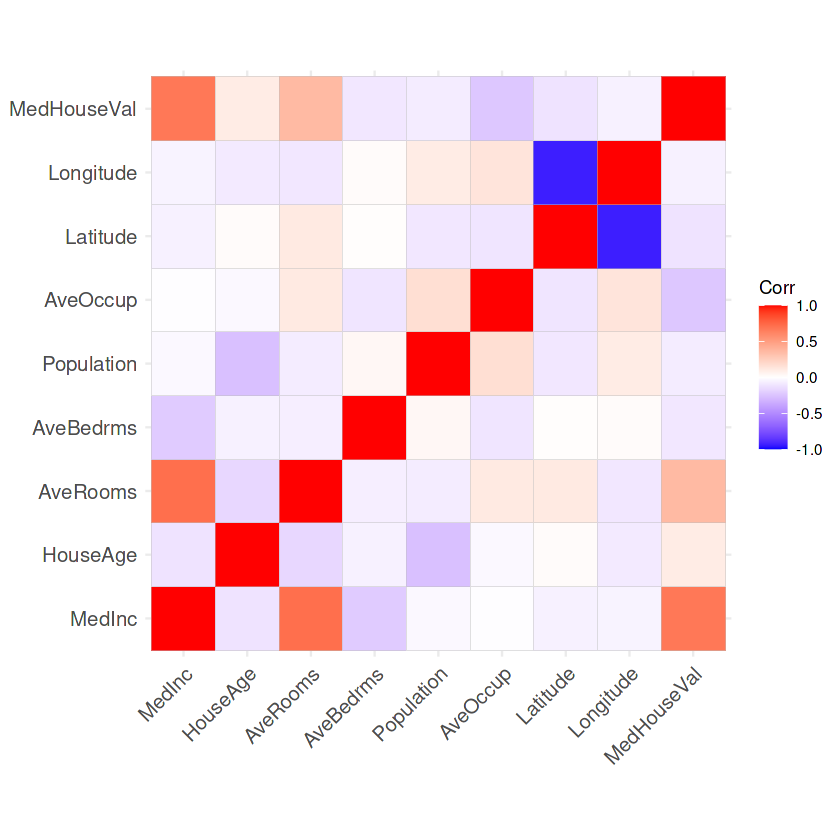

In [126]:


Test_c=Test[,-(1)]
head(Test_c,5)

Train_c=Train[,-c(1)]
head(Train_c)

ggcorrplot::ggcorrplot(cor(Train_c))

summary(Train)

summary(Test)

cor(Train)

nullcount=is.null(Train)
nullcount

# Corelation Plots after Cleaning

Warning message in cor(x, y):
“the standard deviation is zero”



	Pearson's product-moment correlation

data:  Train$MedInc and Train$MedHouseVal
t = 179.38, df = 37135, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6758683 0.6867667
sample estimates:
      cor 
0.6813553 



	Pearson's product-moment correlation

data:  Train$Population and Train$MedHouseVal
t = -16.086, df = 37135, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.09327642 -0.07307593
sample estimates:
        cor 
-0.08318472 



	Pearson's product-moment correlation

data:  Train$AveOccup and Train$MedHouseVal
t = -47.78, df = 37135, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2502171 -0.2310539
sample estimates:
       cor 
-0.2406589 



	Pearson's product-moment correlation

data:  Train$AveRooms and Train$MedHouseVal
t = 71.371, df = 37135, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3383366 0.3562244
sample estimates:
      cor 
0.3473121 



	Pearson's product-moment correlation

data:  Train$AveBedrms and Train$MedHouseVal
t = NA, df = 37135, p-value = NA
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 NA NA
sample estimates:
cor 
 NA 


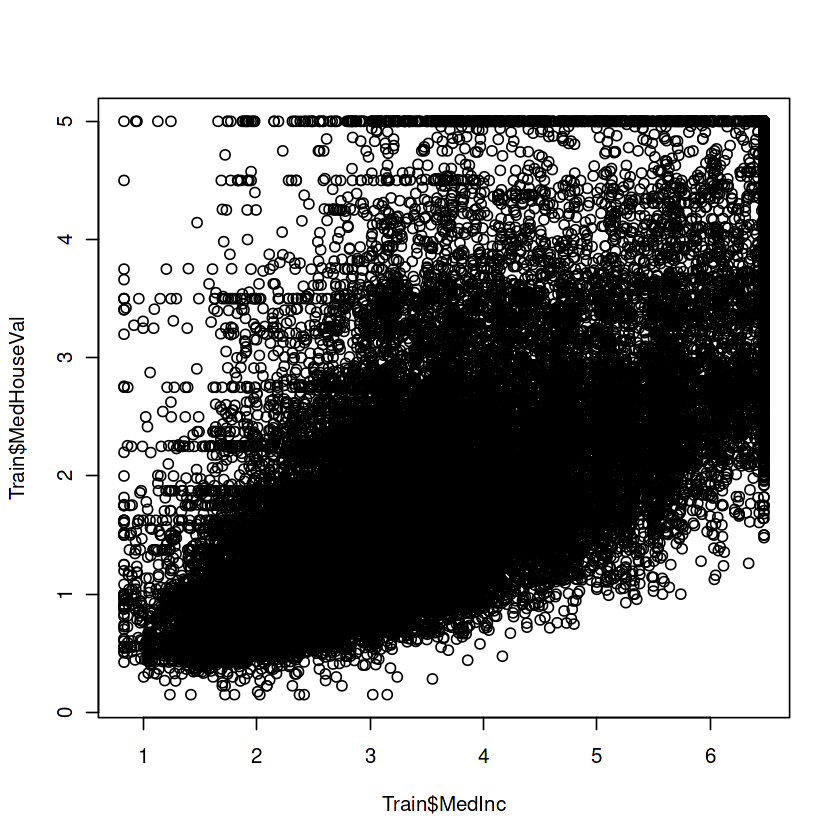


	Pearson's product-moment correlation

data:  Train$AveRooms and Train$MedInc
t = 184.81, df = 37135, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6868295 0.6974259
sample estimates:
     cor 
0.692165 



	Pearson's product-moment correlation

data:  Train$MedHouseVal and Train$MedInc
t = 179.38, df = 37135, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6758683 0.6867667
sample estimates:
      cor 
0.6813553 



	Pearson's product-moment correlation

data:  Train$MedHouseVal and Train$AveRooms
t = 71.371, df = 37135, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3383366 0.3562244
sample estimates:
      cor 
0.3473121 


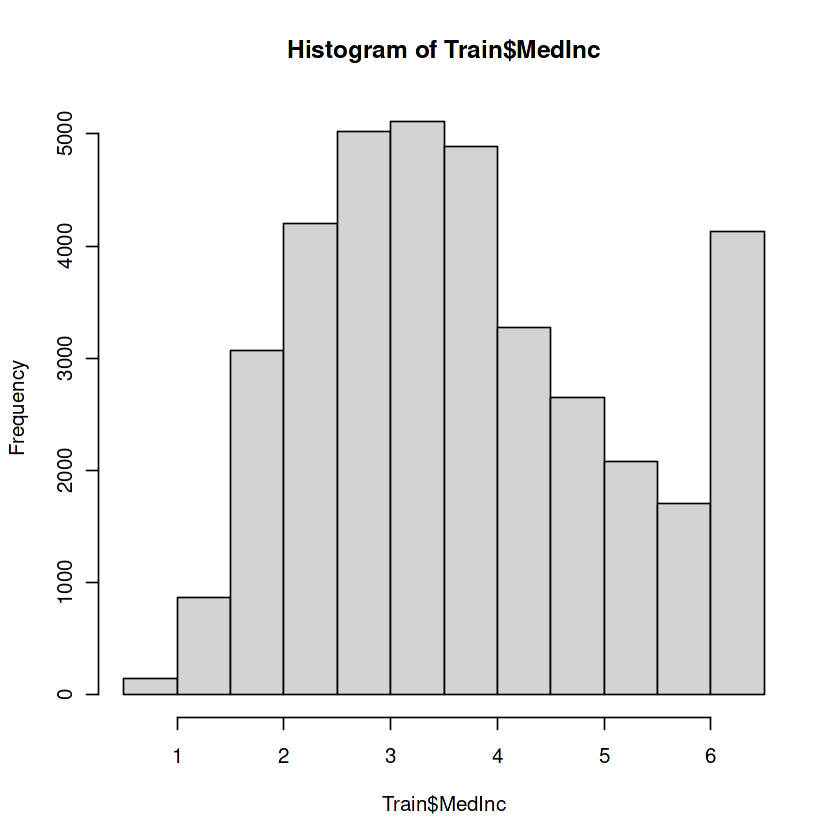

In [90]:
corel1trg = cor.test(Train$MedInc, Train$MedHouseVal , method = "pearson")
corel2trg = cor.test(Train$Population, Train$MedHouseVal , method = "pearson")
corel3trg = cor.test(Train$AveOccup, Train$MedHouseVal , method = "pearson")
corel4trg = cor.test(Train$AveRooms , Train$MedHouseVal , method = "pearson")
corel5trg = cor.test(Train$AveBedrms, Train$MedHouseVal , method = "pearson")
 

corel1trg
corel2trg
corel3trg
corel4trg
corel5trg

plot(Train$MedInc, Train$MedHouseVal)


hist(Train$MedInc)   


corel1 = cor.test(Train$AveRooms, Train$MedInc , method = "pearson")
corel1
corel2 = cor.test(Train$MedHouseVal, Train$MedInc , method = "pearson")
corel2
corel3 = cor.test(Train$MedHouseVal, Train$AveRooms , method = "pearson")
corel3


# Model Building And Training of Model 

In [127]:
lm1=lm(MedHouseVal~.,Train_c)
summary(lm1)
library(Metrics)


Call:
lm(formula = MedHouseVal ~ ., data = Train_c)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6822 -0.4731 -0.0900  0.3531  5.0040 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.093e+01  5.554e-01 -55.695  < 2e-16 ***
MedInc       5.551e-01  4.466e-03 124.295  < 2e-16 ***
HouseAge     1.204e-02  3.417e-04  35.234  < 2e-16 ***
AveRooms    -9.230e-02  5.854e-03 -15.765  < 2e-16 ***
AveBedrms    1.437e+00  8.117e-02  17.701  < 2e-16 ***
Population  -1.767e-05  6.258e-06  -2.824  0.00475 ** 
AveOccup    -4.345e-01  7.453e-03 -58.298  < 2e-16 ***
Latitude    -3.803e-01  6.036e-03 -63.002  < 2e-16 ***
Longitude   -3.709e-01  6.271e-03 -59.148  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.72 on 37128 degrees of freedom
Multiple R-squared:  0.6139,	Adjusted R-squared:  0.6138 
F-statistic:  7379 on 8 and 37128 DF,  p-value: < 2.2e-16


In [132]:
LM=lm(MedHouseVal~MedInc+HouseAge+AveRooms+AveBedrms+Population+AveOccup+Latitude+Longitude,Train)
summary(LM)


Call:
lm(formula = MedHouseVal ~ MedInc + HouseAge + AveRooms + AveBedrms + 
    Population + AveOccup + Latitude + Longitude, data = Train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6822 -0.4731 -0.0900  0.3531  5.0040 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.093e+01  5.554e-01 -55.695  < 2e-16 ***
MedInc       5.551e-01  4.466e-03 124.295  < 2e-16 ***
HouseAge     1.204e-02  3.417e-04  35.234  < 2e-16 ***
AveRooms    -9.230e-02  5.854e-03 -15.765  < 2e-16 ***
AveBedrms    1.437e+00  8.117e-02  17.701  < 2e-16 ***
Population  -1.767e-05  6.258e-06  -2.824  0.00475 ** 
AveOccup    -4.345e-01  7.453e-03 -58.298  < 2e-16 ***
Latitude    -3.803e-01  6.036e-03 -63.002  < 2e-16 ***
Longitude   -3.709e-01  6.271e-03 -59.148  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.72 on 37128 degrees of freedom
Multiple R-squared:  0.6139,	Adjusted R-squared:  0.6138 
F-statistic:  7

In [125]:
lms=lm(MedHouseVal ~.,Train)
summary(lms)


Call:
lm(formula = MedHouseVal ~ ., data = Train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6774 -0.4726 -0.0902  0.3536  5.0060 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.093e+01  5.555e-01 -55.673  < 2e-16 ***
id          -2.967e-07  3.485e-07  -0.851  0.39451    
MedInc       5.551e-01  4.466e-03 124.297  < 2e-16 ***
HouseAge     1.204e-02  3.417e-04  35.233  < 2e-16 ***
AveRooms    -9.231e-02  5.854e-03 -15.768  < 2e-16 ***
AveBedrms    1.437e+00  8.118e-02  17.701  < 2e-16 ***
Population  -1.767e-05  6.258e-06  -2.823  0.00476 ** 
AveOccup    -4.345e-01  7.453e-03 -58.298  < 2e-16 ***
Latitude    -3.803e-01  6.036e-03 -62.998  < 2e-16 ***
Longitude   -3.709e-01  6.271e-03 -59.143  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.72 on 37127 degrees of freedom
Multiple R-squared:  0.6139,	Adjusted R-squared:  0.6138 
F-statistic:  6559 on 9 and 37127 DF,  p-value: < 2

In [122]:
lms2=lm(MedHouseVal ~MedInc+HouseAge+AveRooms+AveOccup ,Train)
summary(lms2)


Call:
lm(formula = MedHouseVal ~ MedInc + HouseAge + AveRooms + AveOccup, 
    data = Train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5374 -0.5069 -0.1017  0.3764  5.3536 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.5104923  0.0298797   50.55   <2e-16 ***
MedInc       0.6693502  0.0039595  169.05   <2e-16 ***
HouseAge     0.0159861  0.0003362   47.55   <2e-16 ***
AveRooms    -0.2120408  0.0055671  -38.09   <2e-16 ***
AveOccup    -0.4515531  0.0075500  -59.81   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7616 on 37132 degrees of freedom
Multiple R-squared:  0.5679,	Adjusted R-squared:  0.5679 
F-statistic: 1.22e+04 on 4 and 37132 DF,  p-value: < 2.2e-16


In [133]:
lms3=lm(MedHouseVal ~. - MedInc : Population,Train)
summary(lms3)



Call:
lm(formula = MedHouseVal ~ . - MedInc:Population, data = Train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6774 -0.4726 -0.0902  0.3536  5.0060 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.093e+01  5.555e-01 -55.673  < 2e-16 ***
id          -2.967e-07  3.485e-07  -0.851  0.39451    
MedInc       5.551e-01  4.466e-03 124.297  < 2e-16 ***
HouseAge     1.204e-02  3.417e-04  35.233  < 2e-16 ***
AveRooms    -9.231e-02  5.854e-03 -15.768  < 2e-16 ***
AveBedrms    1.437e+00  8.118e-02  17.701  < 2e-16 ***
Population  -1.767e-05  6.258e-06  -2.823  0.00476 ** 
AveOccup    -4.345e-01  7.453e-03 -58.298  < 2e-16 ***
Latitude    -3.803e-01  6.036e-03 -62.998  < 2e-16 ***
Longitude   -3.709e-01  6.271e-03 -59.143  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.72 on 37127 degrees of freedom
Multiple R-squared:  0.6139,	Adjusted R-squared:  0.6138 
F-statistic:  6559 on 9 and 371

In [118]:
lm2=lm(MedHouseVal~HouseAge+AveRooms+AveBedrms+Population+AveOccup,Train_c)
summary(lm2)
coefficients(lm2)



Call:
lm(formula = MedHouseVal ~ HouseAge + AveRooms + AveBedrms + 
    Population + AveOccup, data = Train_c)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2358 -0.7264 -0.1036  0.5747  4.5579 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.037e+00  4.192e-02  24.732   <2e-16 ***
HouseAge     1.648e-02  4.695e-04  35.097   <2e-16 ***
AveRooms     4.362e-01  5.019e-03  86.904   <2e-16 ***
AveBedrms           NA         NA      NA       NA    
Population   7.839e-05  8.803e-06   8.905   <2e-16 ***
AveOccup    -6.273e-01  1.020e-02 -61.512   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.02 on 37132 degrees of freedom
Multiple R-squared:  0.2247,	Adjusted R-squared:  0.2247 
F-statistic:  2691 on 4 and 37132 DF,  p-value: < 2.2e-16


(Intercept)      HouseAge      AveRooms     AveBedrms    Population 
 1.036767e+00  1.647833e-02  4.361993e-01            NA  7.839041e-05 
     AveOccup 
-6.273266e-01

In [116]:
lm3=lm(MedHouseVal~HouseAge+AveRooms+AveBedrms+Population+AveOccup,Train_c)
summary(lm3)
coefficients(lm3)


Call:
lm(formula = MedHouseVal ~ HouseAge + AveRooms + AveBedrms + 
    Population + AveOccup, data = Train_c)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2358 -0.7264 -0.1036  0.5747  4.5579 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.037e+00  4.192e-02  24.732   <2e-16 ***
HouseAge     1.648e-02  4.695e-04  35.097   <2e-16 ***
AveRooms     4.362e-01  5.019e-03  86.904   <2e-16 ***
AveBedrms           NA         NA      NA       NA    
Population   7.839e-05  8.803e-06   8.905   <2e-16 ***
AveOccup    -6.273e-01  1.020e-02 -61.512   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.02 on 37132 degrees of freedom
Multiple R-squared:  0.2247,	Adjusted R-squared:  0.2247 
F-statistic:  2691 on 4 and 37132 DF,  p-value: < 2.2e-16


(Intercept)      HouseAge      AveRooms     AveBedrms    Population 
 1.036767e+00  1.647833e-02  4.361993e-01            NA  7.839041e-05 
     AveOccup 
-6.273266e-01

In [117]:
lm4=lm(MedHouseVal~AveRooms+Population+AveOccup,Train_c)
summary(lm4)
coefficients(lm4)


Call:
lm(formula = MedHouseVal ~ AveRooms + Population + AveOccup, 
    data = Train_c)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0756 -0.7571 -0.1053  0.5793  4.3554 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.725e+00  3.767e-02  45.787   <2e-16 ***
AveRooms     4.023e-01  5.007e-03  80.356   <2e-16 ***
Population  -1.030e-05  8.571e-06  -1.202     0.23    
AveOccup    -6.116e-01  1.036e-02 -59.058   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.037 on 37133 degrees of freedom
Multiple R-squared:  0.199,	Adjusted R-squared:  0.199 
F-statistic:  3075 on 3 and 37133 DF,  p-value: < 2.2e-16


(Intercept)      AveRooms    Population      AveOccup 
 1.724620e+00  4.023091e-01 -1.029888e-05 -6.116072e-01

# Auto Regress the Model for Best Fitting Variables

In [115]:
install.packages("leaps")
library(leaps)
lm_best=regsubsets(MedHouseVal~.,data=Train,nvmax=15)
summary(lm_best)
summary(lm_best)$adjr2

which.max(summary(lm_best)$adjr2)
 


coefficients(lm_best,8)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Subset selection object
Call: regsubsets.formula(MedHouseVal ~ ., data = Train, nvmax = 15)
9 Variables  (and intercept)
           Forced in Forced out
id             FALSE      FALSE
MedInc         FALSE      FALSE
HouseAge       FALSE      FALSE
AveRooms       FALSE      FALSE
AveBedrms      FALSE      FALSE
Population     FALSE      FALSE
AveOccup       FALSE      FALSE
Latitude       FALSE      FALSE
Longitude      FALSE      FALSE
1 subsets of each size up to 9
Selection Algorithm: exhaustive
         id  MedInc HouseAge AveRooms AveBedrms Population AveOccup Latitude
1  ( 1 ) " " "*"    " "      " "      " "       " "        " "      " "     
2  ( 1 ) " " "*"    " "      " "      " "       " "        "*"      " "     
3  ( 1 ) " " "*"    "*"      " "      " "       " "        "*"      " "     
4  ( 1 ) " " "*"    " "      " "      " "       " "        "*"      "*"     
5  ( 1 ) " " "*"    "*"      " "      " "       " "        "*"      "*"     
6  ( 1 ) " " "*"    "*"      " "  

[1] 0.4642306 0.5193043 0.5510269 0.5947803 0.6088338 0.6112423 0.6137387
[8] 0.6138112 0.6138083

[1] 8

(Intercept)        MedInc      HouseAge      AveRooms     AveBedrms 
-3.093351e+01  5.550628e-01  1.203941e-02 -9.229576e-02  1.436846e+00 
   Population      AveOccup      Latitude     Longitude 
-1.766834e-05 -4.344698e-01 -3.802953e-01 -3.709328e-01

# Predicting the Dependent Variable , RMSE Check , MSE Check 

In [22]:
Predict=predict(lms2,Train_c)

rmse=sqrt(mean(lms2$residuals^2))
rmse
mse=mean(lms2$residuals^2)
mse

[1] 0.6919603

[1] 0.4788091

In [23]:
Predict=predict(lms2,Test_c)
head(Predict,5)

mean(lms2$residuals^2)

1         2         3         4         5 
0.4470578 1.0268108 3.7417458 3.2297334 2.2726488

[1] 0.4788091

# Submission FIle Markdown

In [24]:
head(Submisson,5)
Submisson$MedHouseVal=Predict
Submisson$id=Test$id
head(Submisson,5)

,id,MedHouseVal
,<int>,<dbl>
1,37137,2.079751
2,37138,2.079751
3,37139,2.079751
4,37140,2.079751
5,37141,2.079751


,id,MedHouseVal
,<int>,<dbl>
1,37137,0.4470578
2,37138,1.0268108
3,37139,3.7417458
4,37140,3.2297334
5,37141,2.2726488


In [25]:
write.csv(Submisson, "submission.csv", row.names = FALSE)